<a href="https://colab.research.google.com/github/awr7/Machine-Learning-Algorithms/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

*   By: Angel Rosario

# About This Project


This project goes into the intricate world of Support Vector Machines (SVMs), a cornerstone of supervised learning, showcasing their versatility in handling both linear and non-linear classification tasks. Using the Iris Flower Dataset, the project begins by implementing a linear SVM classifier, demonstrating how a straightforward linear boundary can effectively differentiate between species. We then progresses to exploring the realm of kernel SVMs, where the data is projected into a higher-dimensional space using non-linear kernels like Radial Basis Function (RBF). This approach vividly illustrates the flexibility of SVMs in dealing with more complex, non-linearly separable data. The finale of the project involves tuning the SVM's soft margin parameter, C, to optimize the balance between a strict and a lenient decision boundary. This fine-tuning is crucial in practical applications where data overlap and various levels of classification robustness are required.



In [1]:
#@title Imports and Helper and Visualization Functions

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    """Plot the decision boundary of DecisionTree"""
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # plt.axis('equal')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    # ax.set(xlim=xlim, ylim=ylim)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

---
## Data Loading and Preprocessing

We are using the Seaborn libary for data loading and preprocessing: https://seaborn.pydata.org/introduction.html

For this project we use the well known 'Iris Flower'-Dataset, which is well known in the ML community as a testing set (https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# for this excersise we remove the  'setosa' species
iris = iris.loc[iris['species'] != 'setosa']

The next command `pairplot`. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. See: https://seaborn.pydata.org/generated/seaborn.pairplot.html

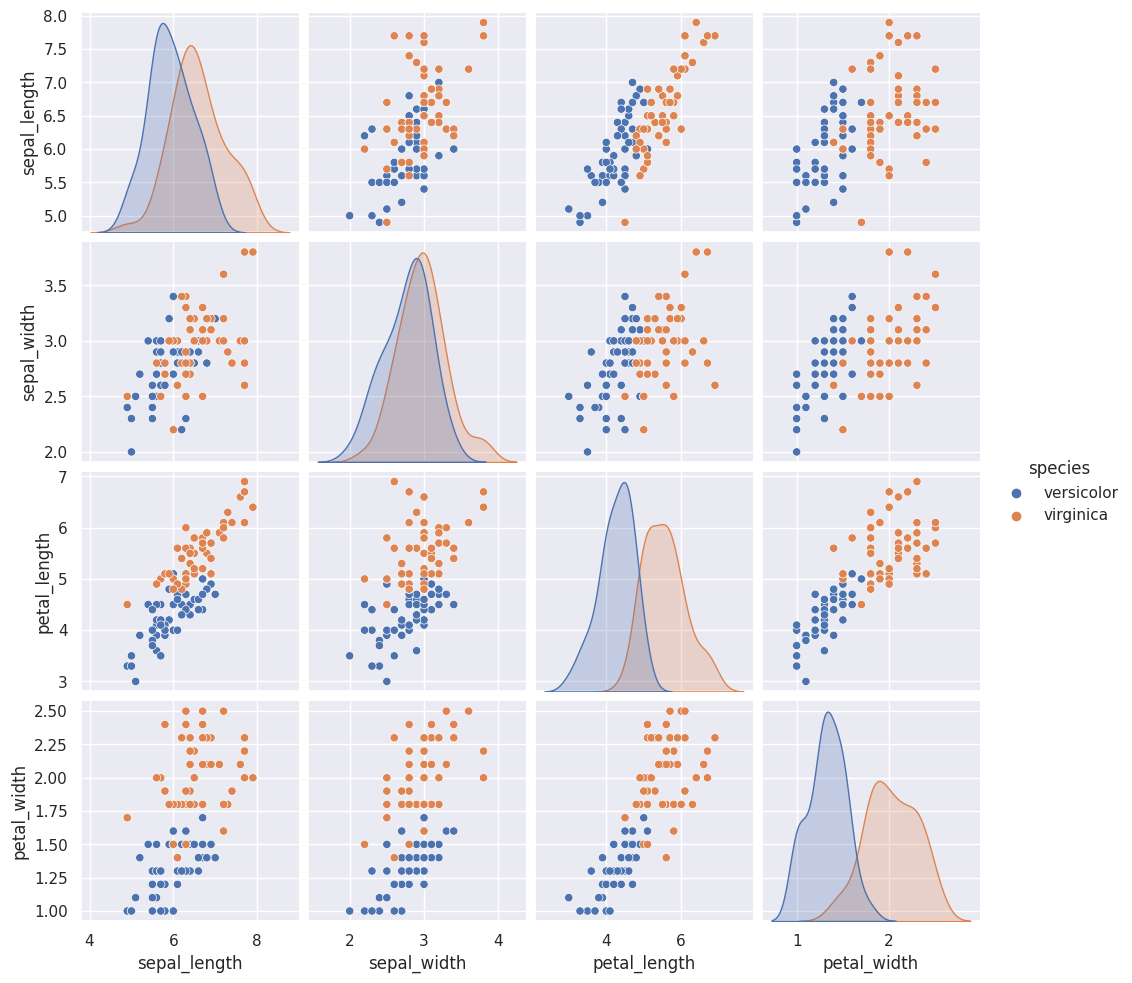

In [4]:
sns.pairplot(iris, hue='species', height=2.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the seaborn dataframe and store them in numpy arrays

In [5]:
X_data = iris.drop('species', axis=1)
X_data = X_data.to_numpy()
X_data.shape


(100, 4)

In [6]:
# create a numeric arrays for the 3 species
y_data = iris.species.replace({'setosa': 2, 'versicolor': 1, 'virginica': 0}, inplace=False)
y_data = y_data.to_numpy()
y_data.shape


(100,)

In [ ]:
# uncommend it if you want to try other data
# from sklearn.datasets import make_circles
# X_data, y_data = make_circles(100, factor=.8, noise=.3)

In [7]:
X_train = X_data
y_train = y_data

---
## Linear SVM

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#reduce dimension using PCA
pca = PCA(n_components=2)
X_data = pca.fit_transform(X_data)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1)

svm_linear = SVC(kernel='linear')

# train on the training data
svm_linear.fit(X_train, y_train)

# make predictions
y_pred = svm_linear.predict(X_test)

<ipython-input-9-5e4de5d5a394>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


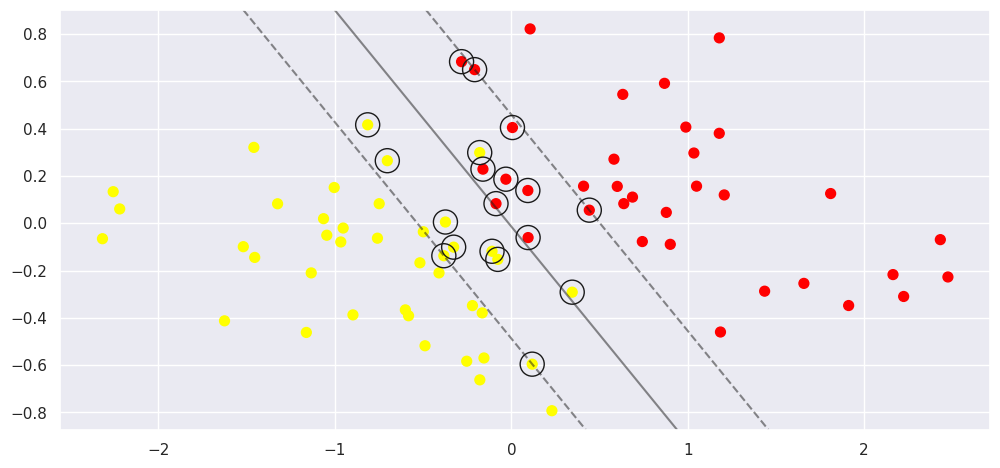

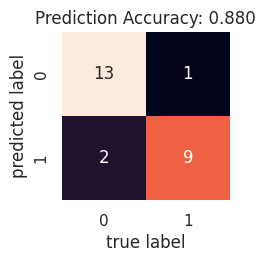

In [9]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(svm_linear);
plt.show()

plt.subplot(2,1,2)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(y_test, y_pred));

The way I tried to implement linear SVM was by using the SVC libary. First I used PCA to reduce the dimensionality of the data and then I split the data into training and testing sets. I then created the classifier making the kernel to be linear and then I trained the model and made predictions on the test set.


---
## Kernel SVM

Where SVM becomes extremely powerful is when it is combined with *kernels*.
Kernels can also be used as the basis function regressions of [In Depth: Linear Regression](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb).
Also there the data can be projected into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby can be fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea.


In [10]:
# create classifier with rbf kernel
svm_kernel = SVC(kernel='rbf', C=1)

# fit the classifier on the training data
svm_kernel.fit(X_train, y_train)

# make predictions
y_pred = svm_kernel.predict(X_test)

<ipython-input-11-d1e786106170>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


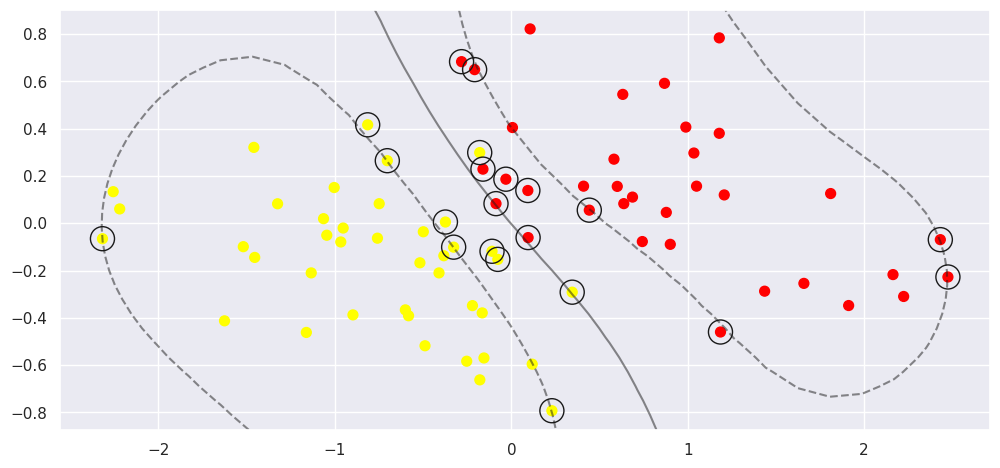

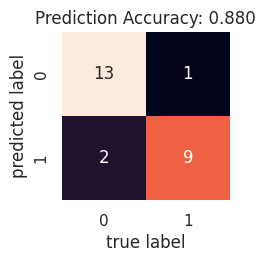

In [11]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(svm_kernel)
plt.show()

plt.subplot(2,1,2)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(y_test, y_pred));

The way I tried to implement Kernel SVM was by using SVC from the sklearn.svm libary and simply created the SVM classifier with radial basis function and set C to 1. Then I fit the classifier onto the training like I did in the linear SVM task and made predictions on the testing data.

---
## Tuning the SVM: Softening Margins

What if the data has some amount of overlap?

Sometimes, datasets are not very clean and a perfect decusion boundary do not exist.

To handle this case, the SVM implements the **slack-variables** which "soften" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.

In [12]:
from sklearn.svm import SVC

# create classifier
svm_soft = SVC(kernel='linear', C=100)

# fit the classifier on the training data
svm_soft.fit(X_train, y_train)

# make predictions
y_pred = svm_soft.predict(X_test)

<ipython-input-13-a3d4dce6606c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


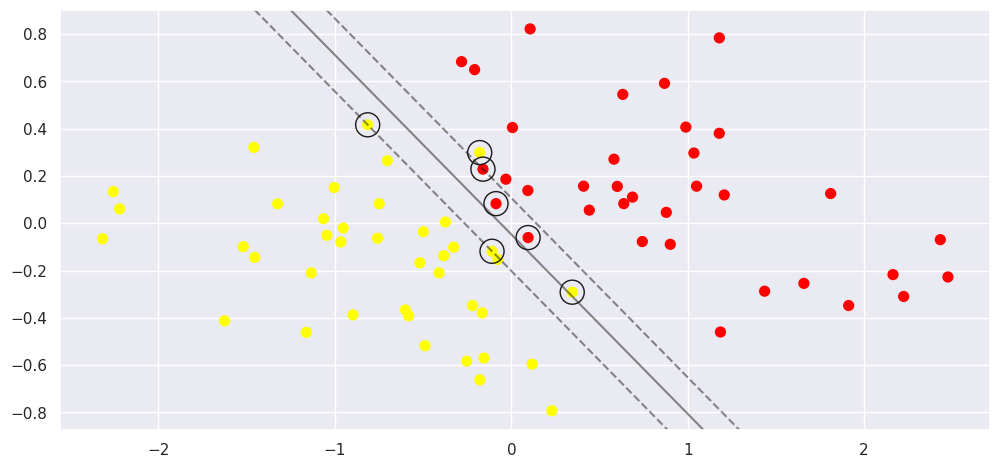

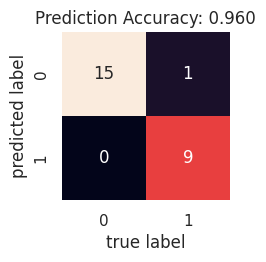

In [13]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(svm_soft)
plt.show()

plt.subplot(2,1,2)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(y_test, y_pred));

The way I expiremented with C was by first decreasing it to see which way it would affect the accuracy and I found that in this example decreasing C would lower the accuracy. I then tried increasing C and found that anything past 100 would give me the same result. I then experimented with the kernel and found that poly and sigmoid had lower accuracy than rbf which is the one I was using but linear had the best accuracy.